## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

Tue Jan 14 10:51:58 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 440.44       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 950M    Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   53C    P8    N/A /  N/A |    265MiB /  2004MiB |     16%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [28]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = ((x / 255.)-0.5)*2
    if flatten:
        x = x.reshape((len(x), -1))
    return x
    
def preproc_y(y,num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y  

In [29]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [30]:
"""Code Here
建立你的神經網路
"""

def build_mlp(input_shape, out_units=10, num_neurons=[512, 512, 256, 256, 256, 128, 128]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i==0:
            x = keras.layers.Dense(units=n_units, name="FC"+str(i), activation='relu')(input_layer)
            x = keras.layers.Dropout(0.2)(x)
        else:
            x = keras.layers.Dense(units=n_units, name="FC"+str(i), activation='relu')(x)
            x = keras.layers.Dropout(0.2)(x)
    output_layer = keras.layers.Dense(units=10, activation='softmax')(x)

    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])    
    return model

In [31]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
FC0 (Dense)                  (None, 512)               1573376   
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
FC1 (Dense)                  (None, 512)               262656    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
FC2 (Dense)                  (None, 256)               131328    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0   

In [32]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [33]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [34]:
import time
tStart = time.time()#計時開始
time.sleep(2)
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 155us/step - loss: 1.9550 - accuracy: 0.2850 - val_loss: 1.7185 - val_accuracy: 0.3915
Epoch 2/100
50000/50000 [==============================] - 8s 150us/step - loss: 1.7331 - accuracy: 0.3827 - val_loss: 1.5688 - val_accuracy: 0.4489
Epoch 3/100
50000/50000 [==============================] - 8s 166us/step - loss: 1.6301 - accuracy: 0.4226 - val_loss: 1.5268 - val_accuracy: 0.4614
Epoch 4/100
50000/50000 [==============================] - 9s 187us/step - loss: 1.5603 - accuracy: 0.4509 - val_loss: 1.4745 - val_accuracy: 0.4827
Epoch 5/100
50000/50000 [==============================] - 9s 183us/step - loss: 1.5101 - accuracy: 0.4694 - val_loss: 1.4422 - val_accuracy: 0.4884
Epoch 6/100
50000/50000 [==============================] - 8s 153us/step - loss: 1.4527 - accuracy: 0.4907 - val_loss: 1.4288 - val_accuracy: 0.4945
Epoch 7/100
50000/50000 [==============================]

50000/50000 [==============================] - 9s 181us/step - loss: 0.6899 - accuracy: 0.7680 - val_loss: 1.4918 - val_accuracy: 0.5630
Epoch 56/100
50000/50000 [==============================] - 9s 171us/step - loss: 0.6737 - accuracy: 0.7739 - val_loss: 1.4849 - val_accuracy: 0.5643
Epoch 57/100
50000/50000 [==============================] - 10s 197us/step - loss: 0.6684 - accuracy: 0.7753 - val_loss: 1.4753 - val_accuracy: 0.5618
Epoch 58/100
50000/50000 [==============================] - 11s 215us/step - loss: 0.6646 - accuracy: 0.7745 - val_loss: 1.4323 - val_accuracy: 0.5651
Epoch 59/100
50000/50000 [==============================] - 10s 198us/step - loss: 0.6552 - accuracy: 0.7786 - val_loss: 1.4493 - val_accuracy: 0.5619
Epoch 60/100
50000/50000 [==============================] - 10s 202us/step - loss: 0.6536 - accuracy: 0.7780 - val_loss: 1.4497 - val_accuracy: 0.5642
Epoch 61/100
50000/50000 [==============================] - 8s 165us/step - loss: 0.6466 - accuracy: 0.7817 -

In [36]:
tEnd = time.time()
print (tEnd - tStart)

909.7506759166718


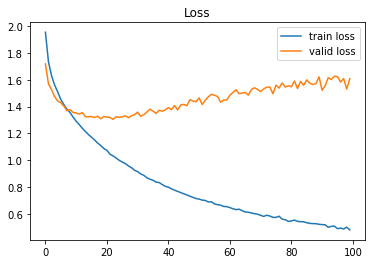

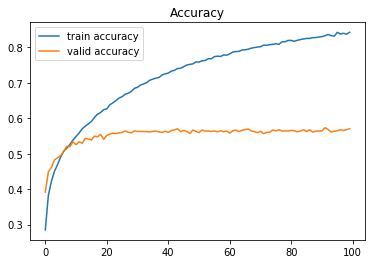

In [39]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()